In [7]:
import warnings
from time import time

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from tools.common_methods import get_train_test_data, print_results
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
n_estimators = 5000

MSE: 133.23851590106008 	R2 score: 0.9141329161159645


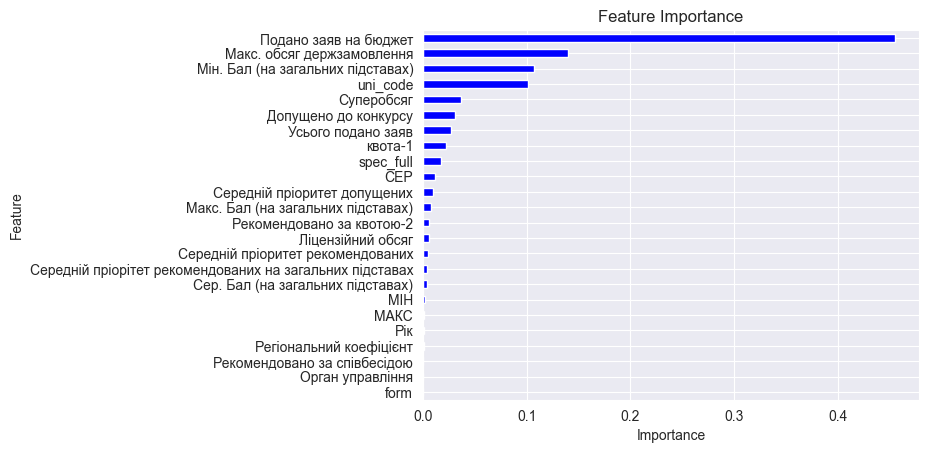

In [11]:
decision_tree = DecisionTreeRegressor(random_state=1, max_depth=1000)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print_results(y_test, y_pred)

importances = pd.Series(decision_tree.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [12]:
results_df = pd.DataFrame(columns=['Model', 'Amount of features', 'MSE', 'R2 Score'])

best_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=n_estimators, random_state=1)
xgb_regressor = XGBRegressor(**joblib.load('../saved_models/xgb_regressor.sav').get_params())
best_lgbm = LGBMRegressor(**joblib.load('../saved_models/lgbm_regressor.sav').get_params())
best_random_forest = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=151, max_depth=16)

for n in range(1, 25):
    start = time()
    n_best_features = importances.sort_values(ascending=False).head(n).keys()
    x_train_n_features = X_train.get(n_best_features)
    x_train_n_features_std = sc.fit_transform(x_train_n_features)

    x_test_n_features = X_test.get(n_best_features)
    x_test_n_features_std = sc.transform(x_test_n_features)

    best_gbr.fit(x_train_n_features_std, y_train)
    y_pred_gbr = best_gbr.predict(x_test_n_features_std)
    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)
    results_df = results_df.append(
        {'Model': 'GradientBoostingRegressor', 'Amount of features': n, 'MSE': mse_gbr, 'R2 Score': r2_gbr},
        ignore_index=True)


    xgb_regressor.fit(x_train_n_features_std, y_train)
    y_pred_xgb = xgb_regressor.predict(x_test_n_features_std)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    results_df = results_df.append(
        {'Model': 'XGBRegressor', 'Amount of features': n, 'MSE': mse_xgb, 'R2 Score': r2_xgb},
        ignore_index=True)

    best_lgbm.fit(x_train_n_features_std, y_train)
    y_pred_lgbm = best_lgbm.predict(x_test_n_features_std)
    mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
    r2_lgbm = r2_score(y_test, y_pred_lgbm)
    results_df = results_df.append(
        {'Model': 'LGBMRegressor', 'Amount of features': n, 'MSE': mse_lgbm, 'R2 Score': r2_lgbm},
        ignore_index=True)

    best_random_forest.fit(x_train_n_features, y_train)
    y_pred_rf = best_random_forest.predict(x_test_n_features)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    results_df = results_df.append(
        {'Model': 'RandomForestRegressor', 'Amount of features': n, 'MSE': mse_rf, 'R2 Score': r2_rf},
        ignore_index=True)

    print(n, '- time for the round:', time() - start)

1 - time for the round: 41.69336247444153
2 - time for the round: 49.910968542099
3 - time for the round: 101.56119894981384
4 - time for the round: 106.83917617797852
5 - time for the round: 126.28914189338684
6 - time for the round: 147.88571071624756
7 - time for the round: 167.83351707458496
8 - time for the round: 165.60744976997375
9 - time for the round: 179.08956694602966
10 - time for the round: 209.8633372783661
11 - time for the round: 247.21978187561035
12 - time for the round: 273.0482313632965
13 - time for the round: 276.68077778816223
14 - time for the round: 291.1185824871063
15 - time for the round: 307.86572790145874
16 - time for the round: 325.76222491264343
17 - time for the round: 374.5906093120575
18 - time for the round: 394.6508455276489
19 - time for the round: 415.6497302055359
20 - time for the round: 420.2406437397003
21 - time for the round: 426.0861585140228
22 - time for the round: 427.0264616012573
23 - time for the round: 429.19663286209106
24 - time 

In [17]:
results_df.to_csv('../readyDatasets/features_comparing_tree.csv', index=False)
results_df

,Model,Amount of features,MSE,R2 Score
0,GradientBoostingRegressor,1,445.293606,0.713025
1,XGBRegressor,1,465.550426,0.699971
2,LGBMRegressor,1,588.787307,0.620549
3,RandomForestRegressor,1,423.145006,0.727299
4,GradientBoostingRegressor,2,355.505982,0.770890
...,...,...,...,...
91,RandomForestRegressor,23,52.317948,0.966283
92,GradientBoostingRegressor,24,36.605499,0.976409
93,XGBRegressor,24,34.225782,0.977943
94,LGBMRegressor,24,44.033760,0.971622


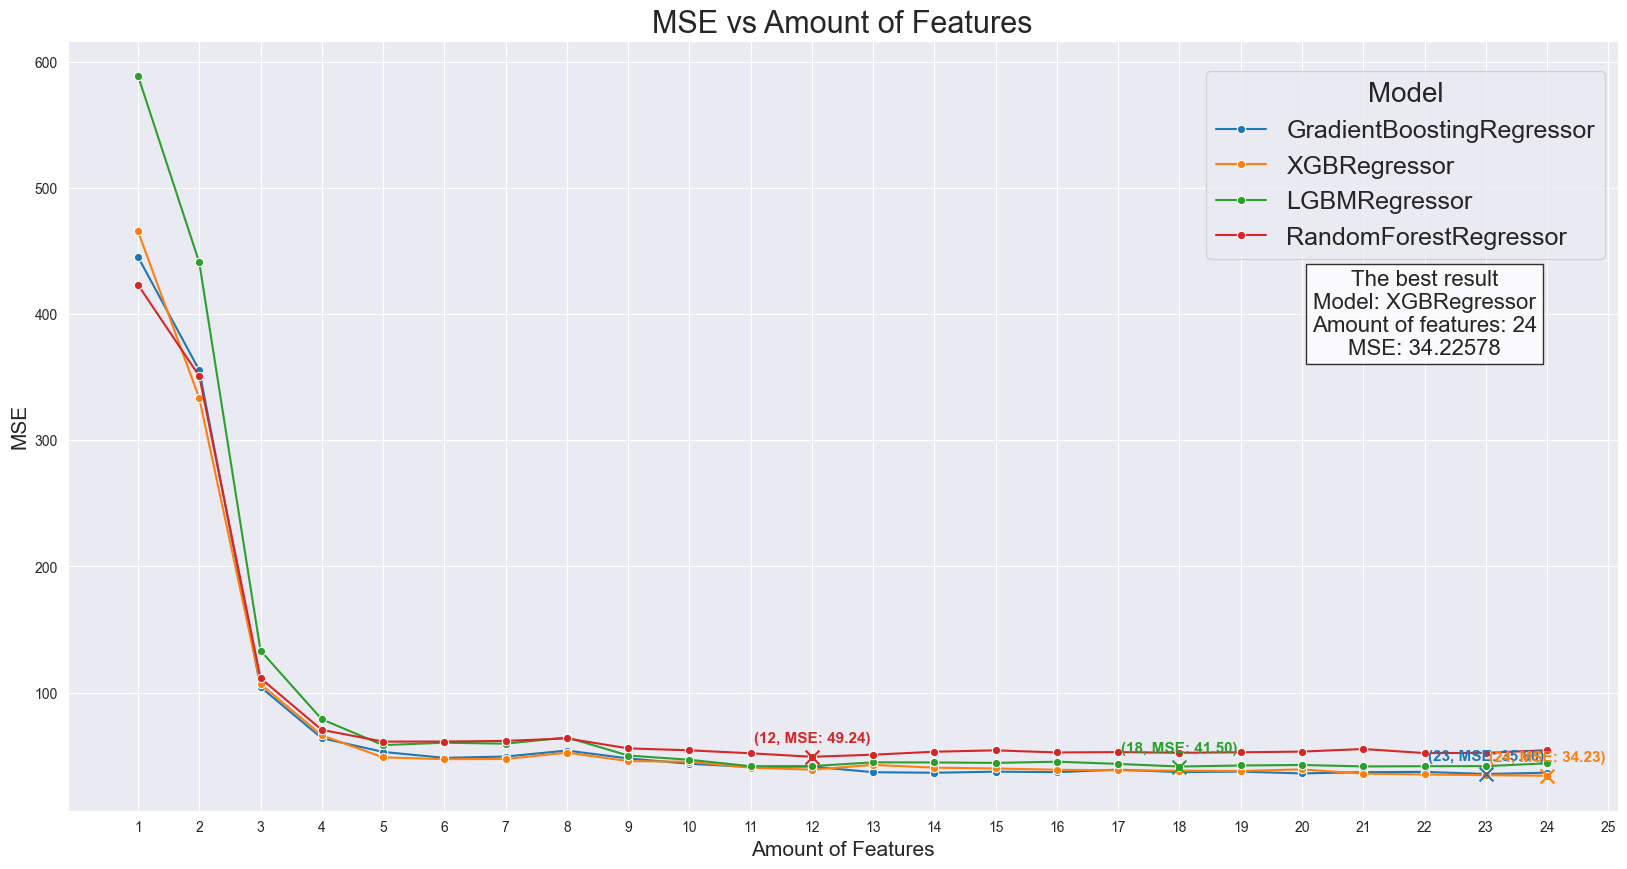

In [14]:
min_mse_indices = results_df.groupby('Model')['MSE'].idxmin()

model_colors = {model: color for model, color in zip(results_df['Model'].unique(), sns.color_palette("tab10", n_colors=len(results_df['Model'].unique())))}

plt.figure(figsize=(20, 10))
sns.lineplot(x='Amount of features', y='MSE', hue='Model', data=results_df, marker='o', palette=model_colors)

for index in min_mse_indices:
    model_color = model_colors[results_df.loc[index, 'Model']]
    plt.scatter(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'MSE'],
                color=model_color, marker='x', s=100, zorder=5)

    plt.annotate(
        f"({results_df.loc[index, 'Amount of features']}, MSE: {results_df.loc[index, 'MSE']:.2f})",
        xy=(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'MSE']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        color=model_color,
        size='11',
        weight='bold'
    )

plt.xticks(range(1, 26))
plt.title('MSE vs Amount of Features', size=22)
plt.xlabel('Amount of Features', size=15)
plt.ylabel('MSE', size=15)
plt.legend(title='Model', bbox_to_anchor=(1, 0.7), loc='lower right', fontsize=18, title_fontsize=20)
plt.grid(True)

absolute_winner_index = results_df['MSE'].idxmin()
winner_info = f"The best result\n" \
              f"Model: {results_df.loc[absolute_winner_index, 'Model']}\n" \
              f"Amount of features: {results_df.loc[absolute_winner_index, 'Amount of features']}\n" \
              f"MSE: {results_df.loc[absolute_winner_index, 'MSE']:.5f}"
plt.text(22, 400, winner_info, ha='center', va='center', fontsize=16,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()

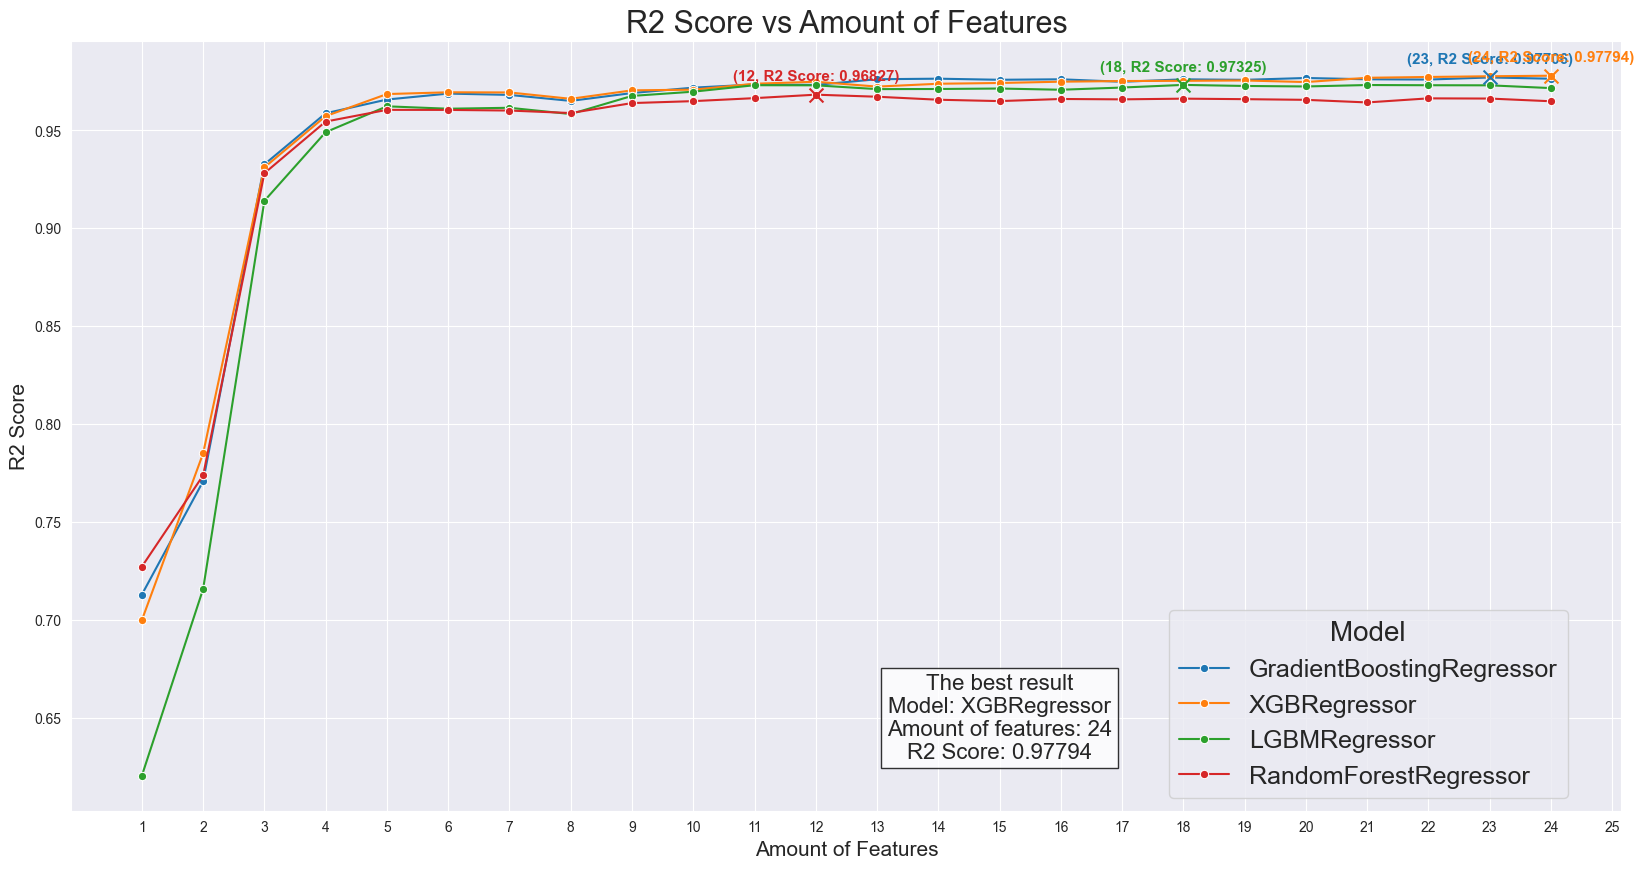

In [16]:
max_r2_indices = results_df.groupby('Model')['R2 Score'].idxmax()

model_colors = {model: color for model, color in zip(results_df['Model'].unique(), sns.color_palette("tab10", n_colors=len(results_df['Model'].unique())))}

plt.figure(figsize=(20, 10))
sns.lineplot(x='Amount of features', y='R2 Score', hue='Model', data=results_df, marker='o', palette=model_colors)

for index in max_r2_indices:
    model_color = model_colors[results_df.loc[index, 'Model']]
    plt.scatter(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'R2 Score'],
                color=model_color, marker='x', s=100, zorder=5)

    plt.annotate(
        f"({results_df.loc[index, 'Amount of features']}, R2 Score: {results_df.loc[index, 'R2 Score']:.5f})",
        xy=(results_df.loc[index, 'Amount of features'], results_df.loc[index, 'R2 Score']),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        color=model_color,
        size='11',
        weight='bold'
    )

plt.xticks(range(1, 26))
plt.title('R2 Score vs Amount of Features', size=22)
plt.xlabel('Amount of Features', size=15)
plt.ylabel('R2 Score', size=15)
plt.legend(title='Model', bbox_to_anchor=(0.7, 0), loc='lower left', fontsize=18, title_fontsize=20)
plt.grid(True)

absolute_winner_index = results_df['R2 Score'].idxmax()
winner_info = f"The best result\n" \
              f"Model: {results_df.loc[absolute_winner_index, 'Model']}\n" \
              f"Amount of features: {results_df.loc[absolute_winner_index, 'Amount of features']}\n" \
              f"R2 Score: {results_df.loc[absolute_winner_index, 'R2 Score']:.5f}"
plt.text(15, 0.65, winner_info, ha='center', va='center', fontsize=16,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.show()